# Load Packages

In [1]:
!pip install ipython

In [2]:
#imports
import string
import numpy as np
import pandas as pd
import IPython
from IPython.core.display import display, HTML

# increase the width of the notebook

display(HTML("<style>.container {width:75% !imprtant;}</style>"))

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\1781332968.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Loading the Dataset

In [3]:
df = pd.read_csv("data.csv")

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\3477112522.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


# Part 1: Data Preparation and Preprocessing 

## 1.1 Descrbing the Data

In [4]:
# Visualisation
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### How many records are there in the data set?

There are 318477 records in 13 columns. The description of the columns are given in the previous question.

In [5]:
# Number of entries in the dataset
df.shape

(318477, 13)

In [6]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [7]:
#fix the data type of column Date
df["Date"] = df["Date"].replace()
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Id                                object
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
dtype: object

### Which period does it cover? How many different dates have job postings?

It covers the period from from 1st of October 2018 to 13th of March 2019.

In [8]:
# Min date
min(df["Date"])

Timestamp('2018-10-01 00:00:00+0000', tz='UTC')

In [9]:
#max date
max(df["Date"])

Timestamp('2019-03-13 00:00:00+0000', tz='UTC')

### How many locations does the dataset have? Which location has the most job postings? 

There are 65 unique locations that are present in the data set. Yorke Peninsula & Clare Valley has the most job postings in the data set.

In [10]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["JobType"]
locationDf.head()

print (locationDf['Count'])

Location
ACT                                    5807
Adelaide                               6313
Adelaide Hills & Barossa                182
Albany & Great Southern                 134
Albury Area                             407
                                       ... 
Western QLD                             485
Whyalla & Eyre Peninsula                198
Wollongong, Illawarra & South Coast    1583
Yarra Valley & High Country             471
Yorke Peninsula & Clare Valley           90
Name: Count, Length: 65, dtype: int64


In [11]:
#max
max(locationDf['Location'])

'Yorke Peninsula & Clare Valley'

### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings

There are 30 job sectors and list and total job postings in each sector is given below.

In [12]:
#  List the name of each sector and its’ total of job postings


classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Date"]
classificationDf.head()

print (classificationDf['Count'])

Classification
Accounting                                 9368
Administration & Office Support           10020
Advertising, Arts & Media                   833
Banking & Financial Services               4633
CEO & General Management                    844
Call Centre & Customer Service             3971
Community Services & Development           4485
Construction                               8372
Consulting & Strategy                      1206
Design & Architecture                      1811
Education & Training                       9280
Engineering                                6458
Farming, Animals & Conservation             882
Government & Defence                       7443
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Human Resources & Recruitment              4144
Information & Communication Technology    22796
Insurance & Superannuation                 1474
Legal                                      4237
Manufacturing, Transport 

### Choose your favorite job sector (e.g. Information & Communication Technology),how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

The job sector chosen is accounting. Within accounting, the number of sub-sectors are 25 and the list and number of job postings for each of them are given below.

In [13]:
Job_sector =df[df["Classification"]=="Accounting"]
SubclassificationDf = Job_sector[Job_sector['Classification'].isna()==False]
SubclassificationDf = SubclassificationDf.groupby('SubClassification').count()
SubclassificationDf['SubClassification'] = SubclassificationDf.index
SubclassificationDf['Count'] = SubclassificationDf["Date"]
SubclassificationDf.head()

print (SubclassificationDf['Count'])

SubClassification
Accounts Officers/Clerks                    929
Accounts Payable                            531
Accounts Receivable/Credit Control          612
Analysis & Reporting                        530
Assistant Accountants                       427
Audit - External                            175
Audit - Internal                            174
Bookkeeping & Small Practice Accounting     348
Business Services & Corporate Advisory     1104
Company Secretaries                          19
Compliance & Risk                            72
Cost Accounting                              41
Financial Accounting & Reporting           1183
Financial Managers & Controllers            887
Forensic Accounting & Investigation          24
Insolvency & Corporate Recovery              49
Inventory & Fixed Assets                     25
Management                                  146
Management Accounting & Budgeting           549
Other                                       148
Payroll               

### List the salary ranges and their total of job postings

In [14]:
import matplotlib
#create dataframe for salary ranges
df['salary_ranges'] = df['HighestSalary'] - df['LowestSalary'] #calculating the range
df.head(5) #checking

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,30


In [15]:
salaryDf = df[df['salary_ranges'].isna()==False]
salaryDf = salaryDf.groupby('salary_ranges').count()
salaryDf['salary_ranges'] = salaryDf.index
salaryDf['Count'] = salaryDf["Date"]
salaryDf.head()
print (salaryDf['Count'])

salary_ranges
10     142150
20      51922
30      87153
50      25841
799     11411
Name: Count, dtype: int64


### List the job types. In each job type, what are the lowest salary and highest salary?

There are 4 different job types. The list of those job types and their respective highest and lowest salary are given in the table below:

<table>
  <tr>
    <th>Job Type</th>
    <th>Highest Salary</th>
    <th>Lowest Salary</th>
  </tr>
  <tr>
    <td>Casual/Vacation</td>
    <td>999</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Contract/Temp</td>
    <td>999</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Full Time</td>
    <td>999</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Part Time</td>
    <td>999</td>
    <td>0</td>
  </tr>

In [16]:
df[df['JobType'].isnull()].head()
df.dropna()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,<p>&nbsp;</p>\n <p><strong><em>*&nbsp; ...,0,30,Full Time,30
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07 00:00:00+00:00,Brisbane,Southern Suburbs & Logan,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,<p>One of Australia's best engineering worksho...,0,30,Full Time,30
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...","<p style=""text-align:center;""><strong>What is ...",0,30,Contract/Temp,30
126,37404267,Technician,Zoom Recruitment & Training,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Engineering,Mechanical Engineering,"This Australian Icon, connects the people of t...","<p>This Australian Icon, connects the people o...",0,30,Full Time,30
127,37404230,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197216,37828407&searchrequesttoken=5f3040c0-7469-48cc...,Head of Merchandise Planning,MyHouse,2018-11-29 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Retail & Consumer Products,Planning,MyHouse is seeking an experienced Head of Merc...,"<p>MyHouse is a successful, family owned retai...",200,999,Full Time,799
197217,37828375&searchrequesttoken=5f3040c0-7469-48cc...,IT Project/ Program Manager - Banking,Illuminate Search & Consulting,2018-11-29 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ability to deliver a wide federated model,<ul>\n <li><strong>Work on a large ba...,200,999,Contract/Temp,799
197218,37828374&searchrequesttoken=5f3040c0-7469-48cc...,IT Test Analyst OR Senior IT Test Analyst,Paxus,2018-11-29 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Testing & Quality Assurance,Great opportunity for a IT Test Analyst/Senio...,<p>Leading financial sector is seeking an IT T...,200,999,Contract/Temp,799
197222,37828315&searchrequesttoken=5f3040c0-7469-48cc...,"Contracts Manager - Commercial Lead Required, ...",Quinton Anthony P/L,2018-11-29 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Construction,Contracts Management,National $2 billion builder seeking Contracts ...,<p>This privately owned leading national const...,200,999,Full Time,799


In [17]:
JobTypeDf = df[df['JobType'].isna()==False]
JobTypeDf = JobTypeDf.groupby('JobType').count()
JobTypeDf['JobType'] = JobTypeDf.index
JobTypeDf['Count'] = JobTypeDf["JobType"]
JobTypeDf.head()
print (JobTypeDf['Count'])

JobType
Casual/Vacation    Casual/Vacation
Contract/Temp        Contract/Temp
Full Time                Full Time
Part Time                Part Time
Name: Count, dtype: object


In [18]:
Job_type_Casualvaca =df[df["JobType"]=="Casual/Vacation"]
# Highest Salary for Casual/vacation
Job_type_Casualvaca.dropna()
Job_type_Casualvaca.sort_values(by=['HighestSalary'], ascending=[False])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
219297,37982843,"Scaffolders , riggers , fitters , boilermakers...",Fab industrial,2018-12-23 00:00:00+00:00,NaN,NaN,NaN,NaN,Fab Industrial have a number of roles availabl...,<p>Fab Industrial is fast becoming one of Aust...,200,999,Casual/Vacation,799
42651,37426470,Registered Nurse,McKenzie Aged Care Group,2018-10-10 00:00:00+00:00,Brisbane,Northern Suburbs,Healthcare & Medical,Nursing - Aged Care,At McKenzie Aged Care we don’t just talk about...,"<strong></strong><br><br>\n <p style=""t...",200,999,Casual/Vacation,799
113655,37525685,ICU Registrar,Calvary Health Care Adelaide,2018-10-22 00:00:00+00:00,Adelaide,NaN,Healthcare & Medical,Residents & Registrars,ICU Registrar training position in acute Priva...,<strong>Calvary Wakefield Hospital</strong><br...,200,999,Casual/Vacation,799
194002,37921797&searchrequesttoken=fc9318af-32fa-4ee6...,EAP Counsellor,MAX Solutions,2018-12-12 00:00:00+00:00,Toowoomba & Darling Downs,NaN,Healthcare & Medical,"Psychology, Counselling & Social Work","Casual contracting role, providing EAP service...","<div id=""FlashContent"" class=""videoembed""><ifr...",200,999,Casual/Vacation,799
65750,37476623,Drop-in Support Worker,VincentCare,2018-10-16 00:00:00+00:00,Melbourne,Northern Suburbs,Community Services & Development,Housing & Homelessness Services,VincentCare Victoria is seeking an appropriate...,"<p style=""text-align:center;"">&nbsp;<strong>Dr...",200,999,Casual/Vacation,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67541,37519556,Casual Cook in Ashgrove,Jora Local,2018-10-20 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Chefs/Cooks,A cafe in Ashgrove is seeking a casual Cook (u...,A cafe in Ashgrove is seeking a casual Cook (u...,0,30,Casual/Vacation,30
67543,37519555,Casual Dish Hand in Narellan,Jora Local,2018-10-20 00:00:00+00:00,Sydney,South West & M5 Corridor,Hospitality & Tourism,Kitchen & Sandwich Hands,A pub/restaurant/bar in Narellan is seeking a ...,A pub/restaurant/bar in Narellan is seeking a ...,0,30,Casual/Vacation,30
67544,37519554,Massage & Day Spa Therapist,"Mount Lofty House, M Gallery Collection",2018-10-20 00:00:00+00:00,Adelaide,NaN,Trades & Services,Hair & Beauty Services,"Stables Day Spa, Adelaide' Hills Boutique Day ...","<p>Mount&nbsp;Lofty House&nbsp;is an Iconic, b...",0,30,Casual/Vacation,30
67545,37519552,Section Waiters / Food Runners (Hardy's Verand...,"Mount Lofty House, M Gallery Collection",2018-10-20 00:00:00+00:00,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,We are seeking experienced wait staff to join ...,"<div id=""FlashContent"" class=""videoembed""><ifr...",0,30,Casual/Vacation,30


In [19]:
# Lowest Salary for Casual/vacation
Job_type_Casualvaca.dropna()
Job_type_Casualvaca.sort_values(by=['LowestSalary'], ascending=[True])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
204,37404161,Allsports Physiotherapy Casual Physiotherapy R...,Allsports Physiotherapy,2018-10-07 00:00:00+00:00,Gold Coast,NaN,Healthcare & Medical,Medical Administration,Physiotherapy Receptionist required for our Pa...,<p>Allsports Physiotherapy &amp; Sports Medici...,0,30,Casual/Vacation,30
230875,38019023,Plasterer / Concrete Remediation Specialist Ap...,Duratec Australia Pty Ltd,2019-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,Duratec Australia is currently seeking experie...,<p><strong>ABOUT US</strong></p>\n <p>D...,0,30,Casual/Vacation,30
230885,38019014,Experienced Retail Sales Consultant - Departme...,Australian Comfort Group Pty Ltd,2019-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,Product expert in a Department store setting t...,<p><strong>A little bit about us:</strong></p>...,0,30,Casual/Vacation,30
230889,38019010,AUTOMOTIVE CALL CENTRE - CUSTOMER SERVICE OFFICER,Suttons,2019-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,If you're a customer-focused person with a pos...,<p>AUTOMOTIVE CALL CENTRE - CUSTOMER SERVICE O...,0,30,Casual/Vacation,30
230908,38018745,Experienced glazier/carpenter/aluminium fabric...,Ace Shopfitters (Nominee) Pty Ltd,2019-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,persons with experience in handling glass/ gla...,<p> </p><p><strong>About the business</strong>...,0,30,Casual/Vacation,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65750,37476623,Drop-in Support Worker,VincentCare,2018-10-16 00:00:00+00:00,Melbourne,Northern Suburbs,Community Services & Development,Housing & Homelessness Services,VincentCare Victoria is seeking an appropriate...,"<p style=""text-align:center;"">&nbsp;<strong>Dr...",200,999,Casual/Vacation,799
65777,37474618,Locum O&G Specialist with multiple shifts,HCA Doctors,2018-10-16 00:00:00+00:00,Coffs Harbour & North Coast,NaN,Healthcare & Medical,Medical Specialists,Come work on the beautiful North Coast of NSW,Location: North Coast of NSW coastal town<br><...,200,999,Casual/Vacation,799
65784,37474373,Locum Orthopaedic Surgeon with multiple shifts,HCA Doctors,2018-10-16 00:00:00+00:00,Coffs Harbour & North Coast,NaN,Healthcare & Medical,Medical Specialists,Come work on the beautiful North Coast of NSW,Location: North Coast of NSW near beaches&nbsp...,200,999,Casual/Vacation,799
193504,37935896&searchrequesttoken=54e5db3a-b84f-4b02...,OSHC Educator,Brunswick East Primary School,2018-12-14 00:00:00+00:00,Melbourne,Northern Suburbs,Education & Training,Childcare & Outside School Hours Care,Childcare Educator required for large Before a...,<p> </p><p><strong>About the business and the ...,200,999,Casual/Vacation,799


In [20]:
# Highest Salary for Contract/Temp
Job_type_Contracttemp =df[df["JobType"]=="Contract/Temp"]
Job_type_Contracttemp.dropna()
Job_type_Contracttemp.sort_values(by=['HighestSalary'], ascending=[False])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
195947,37867779&searchrequesttoken=5be26f44-3252-4790...,Senior SOE Engineer,GMT People,2018-12-04 00:00:00+00:00,ACT,NaN,Information & Communication Technology,Engineering - Network,Provide technical direction / advice to vendor...,<p>Our Federal Government client is seeking an...,200,999,Contract/Temp,799
195662,37875680&searchrequesttoken=4f7a3f72-a20d-4556...,Database Administrator,u&u. Recruitment Partners,2018-12-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Database Development & Administration,Government department moving through key trans...,<p><strong>About the Role</strong></p>\n ...,200,999,Contract/Temp,799
195644,37876054&searchrequesttoken=0821c342-c714-4dd4...,Solution Architect - Wintel,FinXL IT Professional Services,2018-12-05 00:00:00+00:00,ACT,NaN,Information & Communication Technology,Architects,FinXL is looking to engage a Solution Architec...,<ul>\n <li>6-12 months contract </li>...,200,999,Contract/Temp,799
195645,37668215&searchrequesttoken=0821c342-c714-4dd4...,AXIOM Specialist - Technical BA/Developer/SQL/...,Mane Consulting,2018-12-05 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Business/Systems Analysts,A unique opportunity for an AXIOM Specialist /...,<p>A unique opportunity for an AXIOM Specialis...,200,999,Contract/Temp,799
195652,37875859&searchrequesttoken=4f7a3f72-a20d-4556...,General Practice - SMO Emergency Medicine,Global Medics Australia,2018-12-05 00:00:00+00:00,Western QLD,NaN,Healthcare & Medical,General Practitioners,GP with ED skills required for clinic in Cunna...,<p>- Rural South West QLD Location <br> - Clin...,200,999,Contract/Temp,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159534,37937284&searchrequesttoken=584c834d-7ac1-4bd6...,Postdoctoral Research Scientist,The Westmead Institute for Medical Research (W...,2018-12-14 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Healthcare & Medical,Clinical/Medical Research,An exciting role within the Centre for Virus R...,<p>The Westmead Institute for Medical Research...,0,30,Contract/Temp,30
159539,37937281&searchrequesttoken=584c834d-7ac1-4bd6...,Counterbalance Forklift Operators - $27 ph - Y...,Australian Personnel Solutions,2018-12-14 00:00:00+00:00,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution","We are currently looking for fit, competent an...","<h2 class=""subheading""><strong>If you are look...",0,30,Contract/Temp,30
159542,37937278&searchrequesttoken=584c834d-7ac1-4bd6...,Risk Advisory Consultant,Hudson,2018-12-14 00:00:00+00:00,Adelaide,NaN,Accounting,Compliance & Risk,Great opportunity to assist the Director with ...,<ul>\n <li>Immediate requirement</li>...,0,30,Contract/Temp,30
159545,37937275&searchrequesttoken=584c834d-7ac1-4bd6...,Locum Registrar Metro Perth Feb 19 Onwards,Charterhouse Medical,2018-12-14 00:00:00+00:00,Perth,NaN,Healthcare & Medical,Residents & Registrars,Great opportunity for a General Medicine Regis...,<p><strong>Overview:</strong><br>&nbsp;<br>Cha...,0,30,Contract/Temp,30


In [21]:
# Lowest Salary for Contract/Temp
Job_type_Contracttemp.sort_values(by=['LowestSalary'], ascending=[True])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...","<p style=""text-align:center;""><strong>What is ...",0,30,Contract/Temp,30
139549,37693552,Housing and Tenancy Officer | NSW Government,SB Recruitment Pty Ltd,2018-11-12 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Administration & Office Support,Administrative Assistants,NSW Gov. org. seeking Client Service officers ...,<p><strong>The Company….. </strong></p>\n ...,0,30,Contract/Temp,30
139550,37693551,APS3 Business Support Officer,face2face Recruitment,2018-11-12 00:00:00+00:00,Hobart,NaN,Administration & Office Support,Administrative Assistants,A Federal Government department is seeking an ...,<ul>\n <li><strong>face2face Referenc...,0,30,Contract/Temp,30
139551,37693549,Customer Service Officer,Aston Carter,2018-11-12 00:00:00+00:00,Sydney,North West & Hills District,Call Centre & Customer Service,Customer Service - Call Centre,Build your career with this leading employer a...,<p><strong>The Organisation</strong></p>\n ...,0,30,Contract/Temp,30
139574,37693527,Front End Loader Operator,NaN,2018-11-12 00:00:00+00:00,Sydney,South West & M5 Corridor,Construction,Plant & Machinery Operators,Located in Wetherill Park we are looking for a...,Protech are currently looking for an experienc...,0,30,Contract/Temp,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193762,37928472&searchrequesttoken=025acc5a-0c99-4788...,Senior Strategic Communications Officer,Veritas Recruitment,2018-12-13 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Consulting & Strategy,Other,Great opportunity to work for a Government Dep...,<p><br><strong>The Company</strong></p>\n ...,200,999,Contract/Temp,799
193758,37928590&searchrequesttoken=025acc5a-0c99-4788...,Business Process Analyst - Contract - Sydney CBD,Modis,2018-12-13 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Business/Systems Analysts,Support and Drive transformation initiatives t...,<p><strong>The Company:</strong><br> A leading...,200,999,Contract/Temp,799
193757,37928661&searchrequesttoken=025acc5a-0c99-4788...,Business Focused Project Manager,Greythorn Experis,2018-12-13 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Sydney CBD based role\n\n6 month contract + po...,<p>Sydney CBD based role<br> <br> 6 month cont...,200,999,Contract/Temp,799
193819,37926748&searchrequesttoken=141f9a1f-640f-4993...,Senior Business Analyst,Profusion Group Pty Ltd,2018-12-13 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Business/Systems Analysts,Senior Business Analyst for a tier 1 wealth or...,"<div style=""margin:0 20px 0 20px;""><br>\n ...",200,999,Contract/Temp,799


In [22]:
# Highest Salary for Full Time
Job_type_Full =df[df["JobType"]=="Full Time"]
Job_type_Full.dropna()
Job_type_Full.sort_values(by=['HighestSalary'], ascending=[False])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
194190,37916950&searchrequesttoken=063ec84e-9e47-4c17...,Regional General Manager (Business Banking) - ...,Westpac Group,2018-12-12 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,Banking & Financial Services,Banking - Business,We have created a fantastic new role in our Sm...,<br>The purpose of the Business Bank at Westpa...,200,999,Full Time,799
66359,37436806,General Practitioner (VR GP) - DWS | 6 mth gua...,DXC Medical Recruitment,2018-10-10 00:00:00+00:00,"Wollongong, Illawarra & South Coast",NaN,Healthcare & Medical,General Practitioners,Mixed billing family practice looking for a VR...,<p>Are you looking for DWS GP jobs at a well-e...,200,999,Full Time,799
66355,37436845,Bid Manager,Zenith Search,2018-10-10 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Engineering,Project Management,Experienced Bid Manager required for Tier 1 co...,<ul>\n <li><strong>Tier 1 Contractor ...,200,999,Full Time,799
66354,37437083,Snr Project Manager/Director - Client Side - $...,Frontline Construction Sydney,2018-10-10 00:00:00+00:00,Sydney,NaN,Construction,Project Management,My client is a National Project Management fir...,<p><strong>The Company</strong></p>\n <...,200,999,Full Time,799
66351,37437174,Manager - Gas Turbines and Distributed Generation,Synergy,2018-10-10 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs","Mining, Resources & Energy",Power Generation & Distribution,We are seeking an inspiring people leader to m...,<br>\n <p>Synergy is proud to be West...,200,999,Full Time,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161528,37935250&searchrequesttoken=196e4d0c-e0ef-442e...,"Country, Community and Culture Manager",NaN,2018-12-14 00:00:00+00:00,"Port Hedland, Karratha & Pilbara",NaN,Community Services & Development,Community Development,We're seeking a creative & innovative Manager ...,<p><strong>Kanyirninpa Jukurrpa (KJ)&nbsp;</st...,0,30,Full Time,30
161529,37935249&searchrequesttoken=196e4d0c-e0ef-442e...,Store Manager- Myer Chadstone,Cue & Co Pty Ltd,2018-12-14 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Retail & Consumer Products,Management - Store,Are you ready to move your fashion career forw...,<p><strong>Cue an Australian Icon</strong><br>...,0,30,Full Time,30
161530,37935248&searchrequesttoken=196e4d0c-e0ef-442e...,Help Desk Support/ Database Administrator,Penrite Oil Company,2018-12-14 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Information & Communication Technology,Help Desk & IT Support,Great opportunity to learn a variety of skills...,<p>PENRITE OIL has been operating since 1926 a...,0,30,Full Time,30
161531,37935247&searchrequesttoken=196e4d0c-e0ef-442e...,Cash Reconciliations Officer,The Good Guys Support Centre,2018-12-14 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,Accounting,Accounts Officers/Clerks,We’re looking for a meticulous and results dri...,<ul>\n <li><strong>Multi-award winnin...,0,30,Full Time,30


In [23]:
# Lowest Salary for Fulltime
Job_type_Full.sort_values(by=['LowestSalary'], ascending=[True])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,<p>&nbsp;</p>\n <p><strong><em>*&nbsp; ...,0,30,Full Time,30
140430,37692478,Accounts Payable Officer,COS,2018-11-12 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Accounting,Accounts Payable,Seeking a motivated Accounts Payable Officer w...,<p><strong>Seeking a motivated Accounts Payabl...,0,30,Full Time,30
140431,37692476,Urgent Locum Hospital Exercise Physiologist - ...,Allied Health,2018-11-12 00:00:00+00:00,Sydney,Southern Suburbs & Sutherland Shire,Healthcare & Medical,"Physiotherapy, OT & Rehabilitation",Not registered with HCA Allied Health? Join no...,"<p style=""text-align:justify;""><br><strong>Exe...",0,30,Full Time,30
140433,37692473,AWS Consultant,Jefferson Frank International,2018-11-12 00:00:00+00:00,Melbourne,NaN,Information & Communication Technology,Consultants,Location: Melbourne\nPermanent Role\nSalary: $...,<p><strong>AWS Consultant </strong></p>\n ...,0,30,Full Time,30
140434,37692472,Local Real Estate Agent,Purplebricks Plc,2018-11-12 00:00:00+00:00,"Wollongong, Illawarra & South Coast",NaN,Real Estate & Property,Residential Sales,Work flexible hours from your own home. On-goi...,"<p style=""text-align:justify;"">Purplebricks is...",0,30,Full Time,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196111,37863525&searchrequesttoken=f49e0d0e-3f46-4ca6...,General Practitioners | FRACGP| DWS Location |...,Michael Little Healthcare Pty Ltd,2018-12-04 00:00:00+00:00,"Wollongong, Illawarra & South Coast",NaN,Healthcare & Medical,General Practitioners,Exceptional opportunity within the Wollongong ...,<p>We are a well established non corporate Pra...,200,999,Full Time,799
196112,37863430&searchrequesttoken=f49e0d0e-3f46-4ca6...,National Construction Manager,Pattersons Insurerbuild,2018-12-04 00:00:00+00:00,Melbourne,Northern Suburbs,Construction,Management,An exciting and challenging role is currently ...,<p> </p>\n <p><strong>About the busines...,200,999,Full Time,799
196114,37863379&searchrequesttoken=f49e0d0e-3f46-4ca6...,State Manager,Match Executive,2018-12-04 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,"Great opportunity to lead a highly successful,...",<strong>On offer for you:&nbsp;</strong><br>\n...,200,999,Full Time,799
196101,37863751&searchrequesttoken=df717627-23dc-4a84...,Branch Manager – Hume,Fletcher Building Limited,2018-12-04 00:00:00+00:00,ACT,NaN,Retail & Consumer Products,Management - Store,Key Leadership role available in Hume ACT | Co...,<div>\n <div><strong>About Us</strong...,200,999,Full Time,799


In [24]:
# Highest Salary for Part Time
Job_type_Part =df[df["JobType"]=="Part Time"]
Job_type_Part.dropna()
Job_type_Part.sort_values(by=['HighestSalary'], ascending=[False])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
194050,37920822&searchrequesttoken=70db0625-1598-4187...,Psychologist,Sage of Mind,2018-12-12 00:00:00+00:00,Sydney,South West & M5 Corridor,Healthcare & Medical,"Psychology, Counselling & Social Work",Sage of Mind requires a Psychologist for our g...,<p>Sage of Mind&nbsp;require a Psychologist to...,200,999,Part Time,799
195194,37889625&searchrequesttoken=b078dc87-55df-4a60...,Psychiatrist - Psychiatric Emergency Service- ...,Healthcare Professionals Group,2018-12-07 00:00:00+00:00,"Newcastle, Maitland & Hunter",NaN,Healthcare & Medical,Medical Specialists,"Specialist for the emergency psychiatric unit,...",<p><strong>Benefits</strong></p>\n ...,200,999,Part Time,799
193833,37926280&searchrequesttoken=22012ea3-7079-4175...,Doctors required for Aged Care: flexible hours...,HAWL Healthcare Ltd,2018-12-13 00:00:00+00:00,West Gippsland & Latrobe Valley,NaN,Healthcare & Medical,General Practitioners,Seeking driven FRACGP practitioner to visit Re...,<p> </p><p><strong>About the business and the ...,200,999,Part Time,799
193837,37926250&searchrequesttoken=22012ea3-7079-4175...,Doctors required for Aged Care: flexible hours...,HAWL Healthcare Ltd,2018-12-13 00:00:00+00:00,South West Coast VIC,NaN,Healthcare & Medical,General Practitioners,Seeking driven FRACGP practitioner to visit Re...,<p> </p><p><strong>About the business and the ...,200,999,Part Time,799
193877,37924930&searchrequesttoken=f8f65e60-f014-4b18...,Associate Dentist,Maven Dental Group,2018-12-13 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,Dental,3 days a week available for an experienced Ass...,<strong>CALD_10_Associate</strong><br> <strong...,200,999,Part Time,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161538,37935240&searchrequesttoken=196e4d0c-e0ef-442e...,Community Engagement Officer (Events),Grace Lutheran College,2018-12-14 00:00:00+00:00,Brisbane,Northern Suburbs,Marketing & Communications,Event Management,Seeking applicants who will contribute to our ...,<p><strong>Grace Lutheran College invites appl...,0,30,Part Time,30
161509,37935269&searchrequesttoken=7aee70e1-48bc-4724...,Before and After School Club Assistant,Blue Gum Montessori School,2018-12-14 00:00:00+00:00,Perth,Fremantle & Southern Suburbs,Education & Training,Childcare & Outside School Hours Care,Assist in delivering the Before & After School...,<p><strong>Before and After School Club Assist...,0,30,Part Time,30
161475,37935307&searchrequesttoken=eabe7fb8-ec13-48ee...,Aboriginal Family Led Decision Making (AFLDM),Department of Health and Human Services,2018-12-14 00:00:00+00:00,Melbourne,Northern Suburbs,Community Services & Development,"Child Welfare, Youth & Family Services",An outstanding opportunity to join the vibrant...,<p>An outstanding opportunity currently exists...,0,30,Part Time,30
161468,37723003&searchrequesttoken=eabe7fb8-ec13-48ee...,"Dental Receptionist/Assistant, Mawson Lakes lo...",National Dental Care,2018-12-14 00:00:00+00:00,Adelaide,NaN,Healthcare & Medical,Dental,Part Time Dental Receptionist position availab...,"<p>We are seeking an experienced, confident an...",0,30,Part Time,30


In [25]:
# Lowest Salary for Part time
Job_type_Part.sort_values(by=['LowestSalary'], ascending=[True])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges
158,37404294,Psychologist/Clinical Psychologist,Direction Psychological Services,2018-10-07 00:00:00+00:00,Perth,Fremantle & Southern Suburbs,Healthcare & Medical,"Psychology, Counselling & Social Work",Direction Psychological Services is a large pr...,<p><strong>Clinical Psychologist/Psychologist'...,0,30,Part Time,30
150542,37708189,Senior Hair Dresser,Artistry Hair Design,2018-11-13 00:00:00+00:00,Port Macquarie & Mid North Coast,NaN,Trades & Services,Hair & Beauty Services,We are seeking the services of an experienced ...,<p> </p><p><strong>About the business</strong>...,0,30,Part Time,30
150508,37708787,Veterinarian,Murdoch University,2018-11-13 00:00:00+00:00,Perth,Fremantle & Southern Suburbs,Education & Training,Other,This role will provide emergency veterinary se...,<ul>\n <li><strong>Continuous contrac...,0,30,Part Time,30
150502,37708290,Practice Manager,Belmore Road Medical Centre,2018-11-13 00:00:00+00:00,Melbourne,Eastern Suburbs,Healthcare & Medical,Management,Our friendly practice located in Balwyn is see...,<p>Our Practice is currently seeking a profess...,0,30,Part Time,30
150472,37708822,Front Office Receptionist,Sheraton Mirage Port Douglas,2018-11-13 00:00:00+00:00,Cairns & Far North,NaN,Hospitality & Tourism,Front Office & Guest Services,We are seeking a new member to join our Front ...,<p> </p>\n <p><strong>About the busines...,0,30,Part Time,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193527,37937913&searchrequesttoken=738215af-b014-43fa...,Consultant Radiologist - Women's Imaging,Western Health,2018-12-14 00:00:00+00:00,Melbourne,Western Suburbs,Healthcare & Medical,Medical Imaging,Western Health Medical Imaging (WHMI) is seeki...,<br>\n <p><strong>About Us</strong><br>...,200,999,Part Time,799
193529,37937400&searchrequesttoken=9024d455-de94-41a3...,General Practitioner - GP - Private Billings -...,Douglas Healthcare,2018-12-14 00:00:00+00:00,Brisbane,Bayside & Eastern Suburbs,Healthcare & Medical,General Practitioners,Established VR GP sought for Private Billing p...,<div>\n <div><strong>General Practiti...,200,999,Part Time,799
193534,37934626&searchrequesttoken=9024d455-de94-41a3...,Registered Nurse,McKenzie Aged Care Group,2018-12-14 00:00:00+00:00,Gold Coast,NaN,Healthcare & Medical,Nursing - Aged Care,At McKenzie Aged Care we don’t just talk about...,"<strong></strong><br><br>\n <p style=""t...",200,999,Part Time,799
193579,37819335&searchrequesttoken=edb4d64f-7427-404d...,Experienced Dentist,Ekera Dental,2018-12-14 00:00:00+00:00,Ballarat & Central Highlands,NaN,Healthcare & Medical,Dental,An opportunity has arisen for an experienced d...,<p> </p><p><strong>About the business and the ...,200,999,Part Time,799


## 1.2 Normalise and Clean Data

### Calculate Average Salary for each Job.

In [26]:
df = df.assign(AverageSalary = lambda row: (row.HighestSalary + row.LowestSalary)/2)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,30,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,30,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,30,15.0


### Code to Remove unnecessary characters

In [27]:
#This is done using regex
df["Id"] = df["Id"].replace(to_replace=r'&.*', value ='', regex = True)

### Cleaning the date by removing time

In [28]:
#cleaning date using regex
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,30,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,30,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,30,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,30,15.0


### Change the type of Id to "numeric" and Date to "DateTime"

In [29]:
# Change the column "Id" to type "int64"
df["Id"] = df["Id"].astype(np.int64)

# Change the column "Date" to type "datetime64[ns]"
df["Date"] = pd.to_datetime(df["Date"])

# Checking data type after modification
df.dtypes

Id                                 int64
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
salary_ranges                      int64
AverageSalary                    float64
dtype: object

### Are there any duplicates in the Dataset? Find them and Fix them.

There are 108 duplicates in the DataFrame. The code for this given below.

In [30]:
# Number of duplicates in the DataFrame
df.duplicated().sum()

108

In [31]:
# Removing them from the DataFrame

df = df.drop_duplicates()

In [32]:
# Checking if the duplicates are removed or not
df.duplicated().sum()

0

### Visualizing Missing data

The missing data is visualized using the missingno function. Out of the 318369 data values that each column should have, we have missing data in the Company, Location, Area, Classification, SubClassification, requirement, FullDescription and JobType columns.

In [33]:
df.shape

(318369, 15)

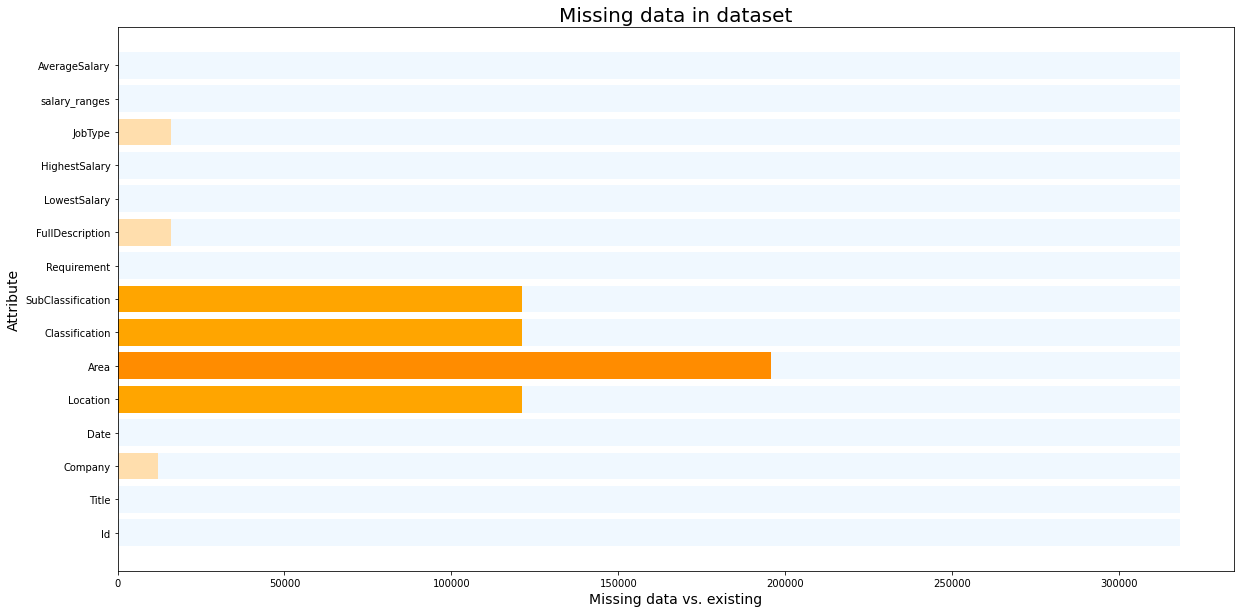

In [34]:
import matplotlib.pyplot as plt

def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

# Part 2. Data Understanding

### Get the Salary range using "AverageSalary" and then display the total jobs of each range in a graph.

In [35]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [36]:
#Grouping by the average salary and then counting the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,,
15.0,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,62586,"15,000",62586
35.0,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,23471,"35,000",23471
45.0,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,34431,"45,000",34431
55.0,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,27018,"55,000",27018
65.0,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,28495,"65,000",28495
75.0,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,28706,"75,000",28706
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,24249,"90,000",24249
110.0,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,27669,"110,000",27669
135.0,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,24506,"135,000",24506


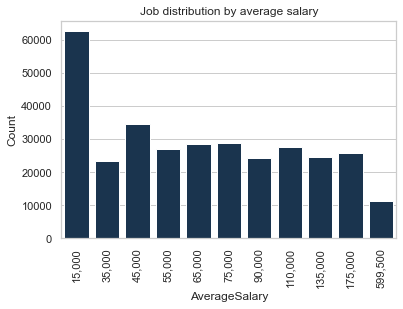

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

sns.barplot(data = averageSalaryDf, x = "AverageSalary", y = "Count", color = "#123456")
plt.title("Job distribution by average salary")
plt.xticks(rotation = 90)
plt.show()

### Pie Chart to display the relation between Job types and number of Jobs

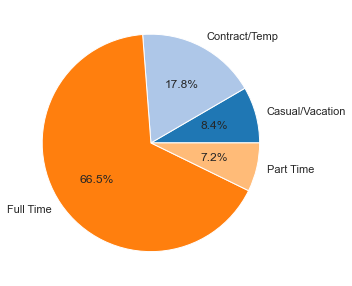

In [38]:
jobTypeDf = df.groupby('JobType').count()
jobTypeDf['Count'] = jobTypeDf["Id"]
jobTypeDf['JobType'] = jobTypeDf.index

plt.figure(figsize = (5,5))
plt.pie(jobTypeDf['Count'], labels = jobTypeDf['JobType'], colors = colors, autopct = "%.1f%%")
plt.show()

### Display the job sectors and number of jobs of each type using a horizontal bar chart

In [39]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending = False, inplace = True)
classificationDf

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,,
Information & Communication Technology,22787,22787,22438,22787,22787,16083,22787,22787,21157,22787,22787,21158,22787,22787,Information & Communication Technology,22787
Trades & Services,17966,17966,16492,17966,17966,9664,17966,17966,17119,17966,17966,17120,17966,17966,Trades & Services,17966
Healthcare & Medical,17068,17068,16373,17068,17068,7948,17068,17068,16368,17068,17068,16371,17068,17068,Healthcare & Medical,17068
Hospitality & Tourism,15513,15513,14881,15513,15513,9634,15513,15513,14287,15513,15513,14291,15513,15513,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics",12372,12372,11461,12372,12372,8542,12372,12372,11748,12372,12372,11750,12372,12372,"Manufacturing, Transport & Logistics",12372
Administration & Office Support,10017,10017,9532,10017,10017,6841,10017,10017,9213,10017,10017,9213,10017,10017,Administration & Office Support,10017
Accounting,9365,9365,9053,9365,9365,7305,9365,9365,8759,9365,9365,8759,9365,9365,Accounting,9365
Education & Training,9272,9272,9030,9272,9272,5864,9272,9272,8711,9272,9272,8715,9272,9272,Education & Training,9272
Construction,8369,8369,8039,8369,8369,5055,8369,8369,8019,8369,8369,8020,8369,8369,Construction,8369


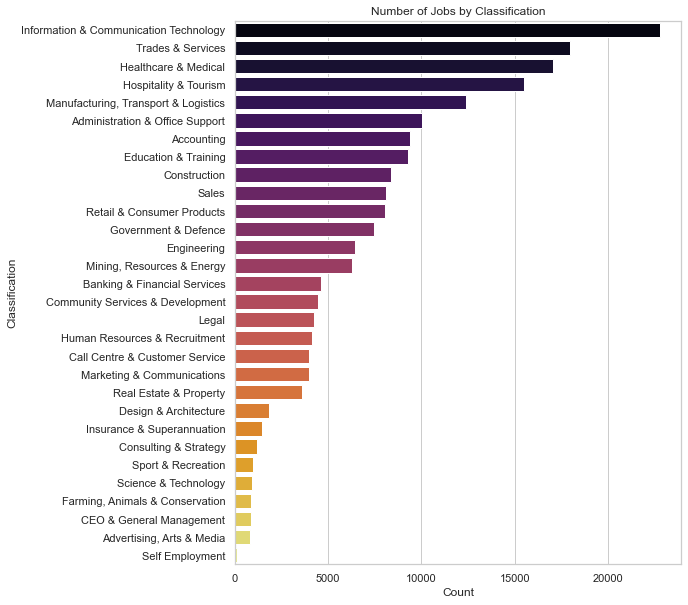

In [40]:
plt.figure(figsize = (8,10))
sns.barplot(
            data = classificationDf, 
            y = "Classification", 
            x = "Count", 
            color = "#123456",
            palette = "inferno"
           )
plt.title("Number of Jobs by Classification")
plt.show()

### Visualize market share of favorite location in the pie chart

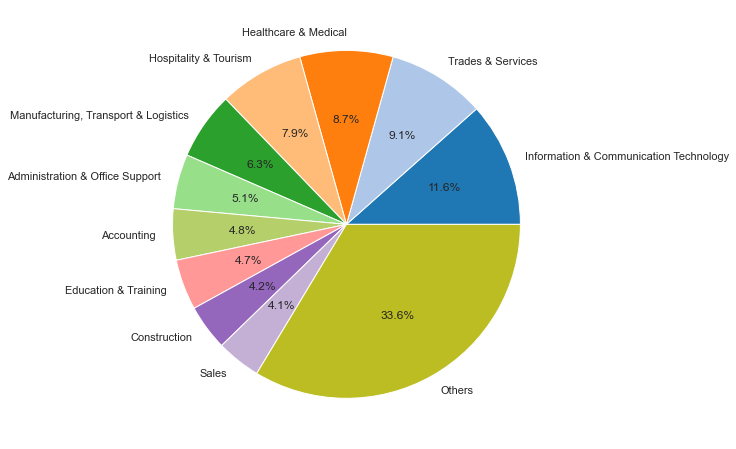

In [41]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

plt.figure(figsize = (8,8))
plt.pie(df2["Value"], labels = df2["Classification"], colors = colors, autopct = "%.1f%%")
plt.show()

### Salary distribution for the top 30 cities based on job postings

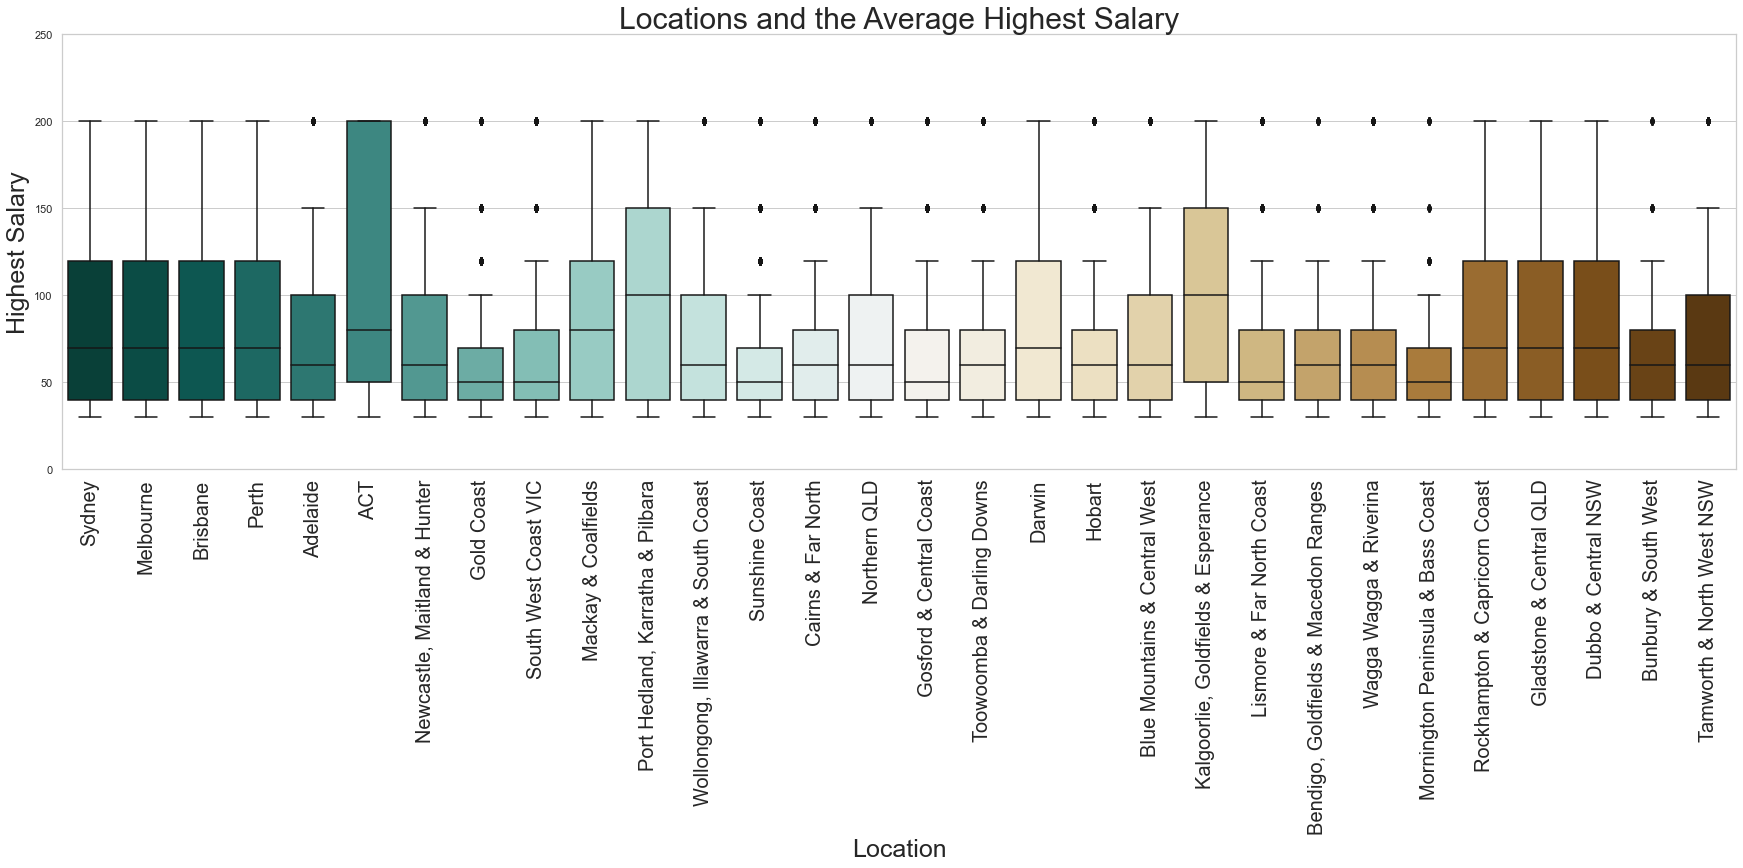

In [42]:
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

# Part 3: Data Analysis and Visualisation

## 3.1 Analysing by Comparison

### The two cities chosen for this section are Brisbane and Hobart

### Which city has more jobs? How many jobs of each type are there in each city?

In [43]:
len(df[df['Location']=='Hobart'])

1050

Hobart has 1050 Jobs

In [44]:
len(df[df['Location']=='Brisbane'])

21455

Brisbane has 21455 Jobs

In [45]:
HBAtypes = df.groupby([df['Location']=='Hobart', 'JobType'])
HBAtypes.count()

Id   Title  Company    Date  Location   Area  \
Location JobType                                                             
False    Casual/Vacation   25250   25250    23774   25250     16180   8750   
         Contract/Temp     53771   53771    52951   53771     33827  20871   
         Full Time        200525  200525   192223  200525    121442  77908   
         Part Time         21786   21786    20814   21786     13240   7858   
True     Casual/Vacation     103     103       97     103       103      0   
         Contract/Temp       126     126      125     126       126      0   
         Full Time           647     647      574     647       647      0   
         Part Time           103     103       88     103       103      0   

                          Classification  SubClassification  Requirement  \
Location JobType                                                           
False    Casual/Vacation           16180              16180        25248   
         Contract/Temp             33827              33827        53771   
         Full Time                121442             121442       200524   
         Part Time                 13240              13240        21782   
True     Casual/Vacation             103                103          103   
         Contract/Temp               126                126          126   
         Full Time                   647                647          647   
         Part Time                   103                103          103   

                          FullDescription  LowestSalary  HighestSalary  \
Location JobType                                                         
False    Casual/Vacation            25237         25250          25250   
         Contract/Temp              53766         53771          53771   
         Full Time                 200470        200525         200525   
         Part Time                  21783         21786          21786   
True     Casual/Vacation              103           103            103   
         Contract/Temp                126           126            126   
         Full Time                    646           647            647   
         Part Time                    103           103            103   

                          salary_ranges  AverageSalary  
Location JobType                                        
False    Casual/Vacation          25250          25250  
         Contract/Temp            53771          53771  
         Full Time               200525         200525  
         Part Time                21786          21786  
True     Casual/Vacation            103            103  
         Contract/Temp              126            126  
         Full Time                  647            647  
         Part Time                  103            103

Hobart has 103 Casual/Vacation Jobs, 126 Contract/Temp Jobs, 647 Full Time Jobs and 103 Part Time Jobs

In [46]:
BNEtypes = df.groupby([df['Location']=='Brisbane', 'JobType'])
BNEtypes.count()

Id   Title  Company    Date  Location   Area  \
Location JobType                                                             
False    Casual/Vacation   23467   23467    22167   23467     14397   7064   
         Contract/Temp     49782   49782    48998   49782     29838  17654   
         Full Time        188175  188175   180346  188175    109092  67510   
         Part Time         20673   20673    19754   20673     12127   6753   
True     Casual/Vacation    1886    1886     1704    1886      1886   1686   
         Contract/Temp      4115    4115     4078    4115      4115   3217   
         Full Time         12997   12997    12451   12997     12997  10398   
         Part Time          1216    1216     1148    1216      1216   1105   

                          Classification  SubClassification  Requirement  \
Location JobType                                                           
False    Casual/Vacation           14397              14397        23465   
         Contract/Temp             29838              29838        49782   
         Full Time                109092             109092       188174   
         Part Time                 12127              12127        20669   
True     Casual/Vacation            1886               1886         1886   
         Contract/Temp              4115               4115         4115   
         Full Time                 12997              12997        12997   
         Part Time                  1216               1216         1216   

                          FullDescription  LowestSalary  HighestSalary  \
Location JobType                                                         
False    Casual/Vacation            23456         23467          23467   
         Contract/Temp              49777         49782          49782   
         Full Time                 188124        188175         188175   
         Part Time                  20670         20673          20673   
True     Casual/Vacation             1884          1886           1886   
         Contract/Temp               4115          4115           4115   
         Full Time                  12992         12997          12997   
         Part Time                   1216          1216           1216   

                          salary_ranges  AverageSalary  
Location JobType                                        
False    Casual/Vacation          23467          23467  
         Contract/Temp            49782          49782  
         Full Time               188175         188175  
         Part Time                20673          20673  
True     Casual/Vacation           1886           1886  
         Contract/Temp             4115           4115  
         Full Time                12997          12997  
         Part Time                 1216           1216

Brisbane has 1886 Casual/Vacation Jobs, 4115 Contract/Temp Jobs, 12997 Full Time Jobs and 1216 Part Time Jobs

### Top 5 Jobs Sectors in Each City and Jobs in Each Sector

In [47]:
HBAdf = df[df['Location']=='Hobart']
HBAdf.groupby(['Classification']).count().sort_values(["Id"], ascending=False).head(5)

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
Classification,,,,,,,,,,,,,,
Healthcare & Medical,172,172,159,172,172,0,172,172,166,172,172,166,172,172
Hospitality & Tourism,99,99,78,99,99,0,99,99,88,99,99,88,99,99
Trades & Services,92,92,79,92,92,0,92,92,90,92,92,90,92,92
Government & Defence,77,77,74,77,77,0,77,77,73,77,77,74,77,77
Education & Training,66,66,52,66,66,0,66,66,61,66,66,61,66,66


The top 5 sectors of jobs in Hobart are: Healthcare & Medical, Hospitality & Tourism, Trades & Services, Government & Defence and Education & Training.

Jobs in each sector:
Healthcare & Medical - 172, 
Hospitality & Tourism - 99, 
Trades & Services - 92, 
Government & Defence - 77, 
Education & Training - 66

In [48]:
BNEdf = df[df['Location']=='Brisbane']
BNEdf.groupby(['Classification']).count().sort_values(["Id"], ascending=False).head(5)

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
Classification,,,,,,,,,,,,,,
Information & Communication Technology,2766,2766,2736,2766,2766,2094,2766,2766,2528,2766,2766,2528,2766,2766
Trades & Services,1992,1992,1839,1992,1992,1629,1992,1992,1914,1992,1992,1914,1992,1992
Healthcare & Medical,1823,1823,1746,1823,1823,1415,1823,1823,1745,1823,1823,1745,1823,1823
"Manufacturing, Transport & Logistics",1667,1667,1570,1667,1667,1480,1667,1667,1578,1667,1667,1578,1667,1667
Hospitality & Tourism,1334,1334,1238,1334,1334,1199,1334,1334,1228,1334,1334,1228,1334,1334


The top 5 sectors of jobs in Brisbane are: Information & Communication Technology, Trades & Services, Healthcare & Medical, Manufacturing, Transport & Logistics and Hospitality & Tourism.

Jobs in each sector:
Information & Communication Technology - 2766, 
Trades & Services - 1992, 
Healthcare & Medical - 1823, 
Manufacturing, Transport & Logistics - 1667, 
Hospitality & Tourism - 1334

### Top 5 Job Sectors for Each City Pie Chart

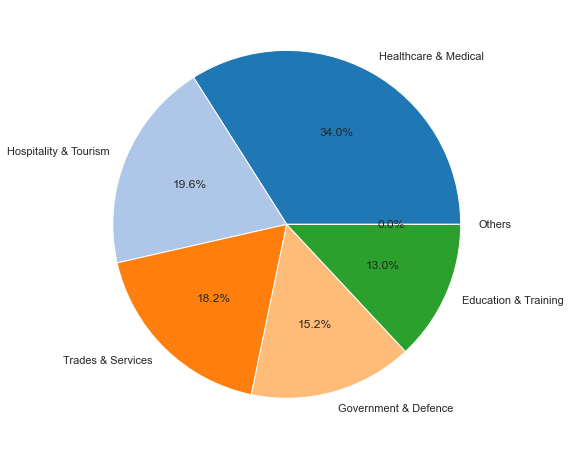

In [49]:
# Hobart Top 5 Job Sector Pie Chart
df_pieHBA = HBAdf['Classification'].groupby(HBAdf['Classification'])

df_pieHBA = df_pieHBA.count().sort_values(ascending=False).head(5).to_frame()
df_pieHBA['Value'] = df_pieHBA["Classification"]
df_pieHBA['Classification'] = df_pieHBA.index
df2HBA = df_pieHBA[:10].copy()
new_rowHBA = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pieHBA["Value"][5:].sum()]
})

df2HBA = pd.concat([df2HBA, new_rowHBA])
df2HBA.index = df2HBA['Classification']

plt.figure(figsize = (8,8))
plt.pie(df2HBA["Value"], labels = df2HBA["Classification"], colors = colors, autopct = "%.1f%%")
plt.show()

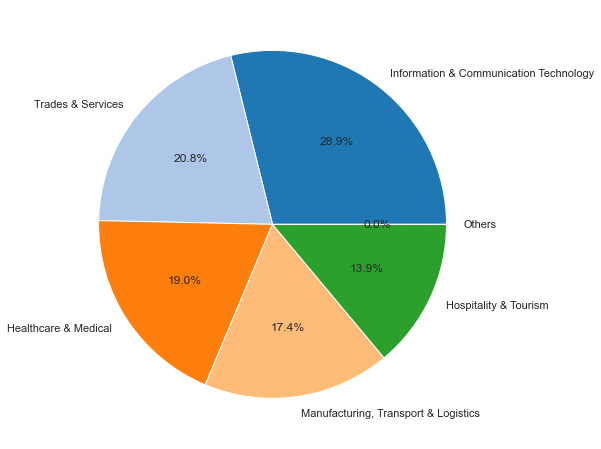

In [50]:
# Brisbane Top 5 Job Sector Pie Chart
df_pieBNE = BNEdf['Classification'].groupby(BNEdf['Classification'])

df_pieBNE = df_pieBNE.count().sort_values(ascending=False).head(5).to_frame()
df_pieBNE['Value'] = df_pieBNE["Classification"]
df_pieBNE['Classification'] = df_pieBNE.index
df2BNE = df_pieBNE[:10].copy()
new_rowBNE = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pieBNE["Value"][5:].sum()]
})

df2BNE = pd.concat([df2BNE, new_rowBNE])
df2BNE.index = df2BNE['Classification']

plt.figure(figsize = (8,8))
plt.pie(df2BNE["Value"], labels = df2BNE["Classification"], colors = colors, autopct = "%.1f%%")
plt.show()

### Job Salary Ranges in Each City

In [51]:
HBAdf.groupby('salary_ranges').count()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
salary_ranges,,,,,,,,,,,,,,
10,587,587,533,587,587,0,587,587,587,565,587,587,566,587
20,145,145,143,145,145,0,145,145,145,141,145,145,141,145
30,258,258,214,258,258,0,258,258,258,218,258,258,218,258
50,31,31,29,31,31,0,31,31,31,26,31,31,26,31
799,29,29,29,29,29,0,29,29,29,28,29,29,28,29


In [52]:
BNEdf.groupby('salary_ranges').count()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
salary_ranges,,,,,,,,,,,,,,
10,10063,10063,9500,10063,10063,8764,10063,10063,10063,9703,10063,10063,9707,10063
20,3261,3261,3175,3261,3261,2425,3261,3261,3261,3175,3261,3261,3175,3261
30,5539,5539,5351,5539,5539,4384,5539,5539,5539,4926,5539,5539,4928,5539
50,1612,1612,1601,1612,1612,1135,1612,1612,1612,1495,1612,1612,1496,1612
799,980,980,974,980,980,695,980,980,980,908,980,980,908,980


### Top 5 Companies in Each City

In [53]:
HBAtop = HBAdf.groupby('Company').count().sort_values('Id', ascending=False).head(5)
HBAtop

,Id,Title,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
Company,,,,,,,,,,,,,,
Searson Buck P/L,34,34,34,34,0,34,34,34,34,34,34,34,34,34
Tasmanian Health Service,23,23,23,23,0,23,23,23,23,23,23,23,23,23
University of Tasmania,21,21,21,21,0,21,21,21,18,21,21,18,21,21
CSIRO,16,16,16,16,0,16,16,16,14,16,16,14,16,16
HOBAN Recruitment,13,13,13,13,0,13,13,13,12,13,13,12,13,13


In [54]:
for i in range(5):
    print(HBAtop.index[i])

Searson Buck P/L
Tasmanian Health Service
University of Tasmania
CSIRO
HOBAN Recruitment


In [55]:
HBAsear = HBAdf[HBAdf['Company']=='Searson Buck P/L'].drop_duplicates(subset=['Classification'])
searSectors = HBAsear['Classification'].tolist()
HBAths = HBAdf[HBAdf['Company']=='Tasmanian Health Service'].drop_duplicates(subset=['Classification'])
thsSectors = HBAths['Classification'].tolist()
HBAut = HBAdf[HBAdf['Company']=='University of Tasmania'].drop_duplicates(subset=['Classification'])
utSectors = HBAut['Classification'].tolist()
HBAcsiro = HBAdf[HBAdf['Company']=='CSIRO'].drop_duplicates(subset=['Classification'])
csiroSectors = HBAcsiro['Classification'].tolist()
HBAhoban = HBAdf[HBAdf['Company']=='HOBAN Recruitment'].drop_duplicates(subset=['Classification'])
hobanSectors = HBAhoban['Classification'].tolist()

searSectors, thsSectors, utSectors, csiroSectors, hobanSectors

(['Manufacturing, Transport & Logistics',
  'Hospitality & Tourism',
  'Administration & Office Support',
  'Farming, Animals & Conservation',
  'Healthcare & Medical',
  'Accounting',
  'Trades & Services',
  'Sales'],
 ['Healthcare & Medical',
  'Government & Defence',
  'Human Resources & Recruitment',
  'CEO & General Management'],
 ['Administration & Office Support',
  'Education & Training',
  'Information & Communication Technology',
  'Legal',
  'Community Services & Development',
  'Farming, Animals & Conservation',
  'Construction'],
 ['Government & Defence',
  'Human Resources & Recruitment',
  'Accounting',
  'Information & Communication Technology',
  'Manufacturing, Transport & Logistics',
  'Marketing & Communications',
  'Science & Technology'],
 ['Government & Defence',
  'Education & Training',
  'Design & Architecture',
  'Accounting',
  'Real Estate & Property'])

As can be seen from above, all of the most popular companies in Hobart had jobs within different sectors.

In [56]:
BNEtop = BNEdf.groupby('Company').count().sort_values('Id', ascending=False).head(5)
BNEtop

,Id,Title,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_ranges,AverageSalary
Company,,,,,,,,,,,,,,
Jora Local,314,314,314,314,314,314,314,314,263,314,314,263,314,314
Hudson,267,267,267,267,215,267,267,267,261,267,267,261,267,267
u&u. Recruitment Partners,265,265,265,265,151,265,265,265,253,265,265,253,265,265
The University of Queensland,247,247,247,247,215,247,247,247,238,247,247,238,247,247
Programmed Skilled Workforce,210,210,210,210,197,210,210,210,183,210,210,183,210,210


In [57]:
for i in range(5):
    print(BNEtop.index[i])

Jora Local
Hudson
u&u. Recruitment Partners
The University of Queensland
Programmed Skilled Workforce


In [58]:
BNEJora = BNEdf[BNEdf['Company']=='Jora Local'].drop_duplicates(subset=['Classification'])
JoraSectors = BNEJora['Classification'].tolist()
BNEhudson = BNEdf[BNEdf['Company']=='Hudson'].drop_duplicates(subset=['Classification'])
hudsonSectors = BNEhudson['Classification'].tolist()
BNEuu = BNEdf[BNEdf['Company']=='u&u. Recruitment Partners'].drop_duplicates(subset=['Classification'])
uuSectors = BNEuu['Classification'].tolist()
BNEuq = BNEdf[BNEdf['Company']=='The University of Queensland'].drop_duplicates(subset=['Classification'])
uqSectors = BNEuq['Classification'].tolist()
BNEpsw = BNEdf[BNEdf['Company']=='Programmed Skilled Workforce'].drop_duplicates(subset=['Classification'])
pswSectors = BNEpsw['Classification'].tolist()

JoraSectors, hudsonSectors, uuSectors, uqSectors, pswSectors

(['Hospitality & Tourism', 'Retail & Consumer Products', 'Trades & Services'],
 ['Information & Communication Technology',
  'Administration & Office Support',
  'Accounting',
  'Call Centre & Customer Service',
  'Marketing & Communications',
  'Community Services & Development',
  'Education & Training',
  'Human Resources & Recruitment',
  'Government & Defence',
  'Engineering',
  'Consulting & Strategy',
  'Hospitality & Tourism',
  'Manufacturing, Transport & Logistics',
  'CEO & General Management',
  'Design & Architecture',
  'Sales',
  'Mining, Resources & Energy',
  'Construction'],
 ['Accounting',
  'Human Resources & Recruitment',
  'Information & Communication Technology',
  'Legal',
  'Construction',
  'Marketing & Communications',
  'Sales',
  'Engineering',
  'Mining, Resources & Energy',
  'Consulting & Strategy',
  'Banking & Financial Services',
  'Administration & Office Support',
  'Community Services & Development',
  'Design & Architecture',
  'Education & Train

As can be seen from above, all of the most popular companies in Brisbane had jobs within different sectors.

### Which City is Better for Employees?

Brisbane is the better city for employees. There are a number of reasons why Brisbane is the better city for potential employees. The first reason Brisbane is better for employees is that Brisbane has more jobs than Hobart (21455 compared to 1050). Coidciding with the overall greater number of jobs, Brisbane also offers a lot more jobs with significant salary ranges. This may mean employees have the opportunity to work their way up into higher paying positions through leveraging their current salary.

## 3.2 Analysing by Time

In [59]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter


from tqdm.notebook import tqdm
tqdm.pandas()

#set seaborn style
sns.set()
sns.set_style("whitegrid")

In [61]:
%%capture --no-display --no-stdout
df = pd.read_csv('data.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")

The Dataset consists of:  318477  rows and  13  columuns


In [62]:
#TODO: fix the data type of column Date
df["Date"] = df["Date"].replace()
df["Date"] = pd.to_datetime(df["Date"])

### Visualising the number of job posts by month, and by day of the month and week.

In [63]:
temp = df[['Date']]
print("This may take a while...")
temp['DayOfMonth'] = temp['Date'].progress_apply(lambda x: pd.Series(x.day))
temp['DayOfWeek'] = temp['Date'].progress_apply(lambda x: pd.Series(x.dayofweek))
temp['Month'] = temp['Date'].progress_apply(lambda x: pd.Series(x.month))
temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))

## Retrieve truly unique days for averaging purposes
# Label days with their month so that truly unique days can be found
days = temp['Date'].progress_apply(lambda x: pd.Series("{}_{}".format(x.day, x.month)))
day_months = days.iloc[:, 0].unique()
unique_day_count = {}

# Get unique days that data was recorded via retrieving day and month of posting
for day in day_months:
    d_m = day.split('_')
    d = int(d_m[0])
    m = int(d_m[1])
    
    if(d in unique_day_count):
        unique_day_count[d] += 1
    else:
        unique_day_count[d] = 1

This may take a while...


  0%|          | 0/318477 [00:00<?, ?it/s]

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\455926405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['DayOfMonth'] = temp['Date'].progress_apply(lambda x: pd.Series(x.day))


  0%|          | 0/318477 [00:00<?, ?it/s]

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\455926405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['DayOfWeek'] = temp['Date'].progress_apply(lambda x: pd.Series(x.dayofweek))


  0%|          | 0/318477 [00:00<?, ?it/s]

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\455926405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Month'] = temp['Date'].progress_apply(lambda x: pd.Series(x.month))


  0%|          | 0/318477 [00:00<?, ?it/s]

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\455926405.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))
C:\Users\jpo-0\AppData\Local\Temp\ipykernel_21940\455926405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))


  0%|          | 0/318477 [00:00<?, ?it/s]

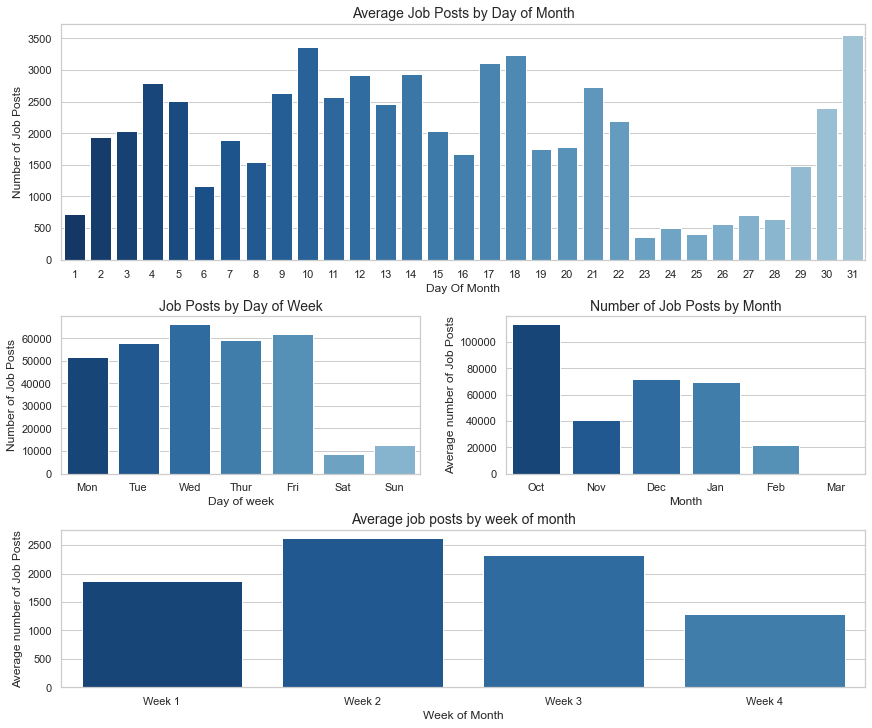

In [64]:
fig = plt.figure(constrained_layout=True, figsize=(12,10))
gs = fig.add_gridspec(3, 2, width_ratios=[1,1], height_ratios=[6,4, 4])

# Average by Day of Month
dayofmonth_counts = temp['DayOfMonth'].value_counts()

# Apply average
for day, count in dayofmonth_counts.items():
    dayofmonth_counts[day] = count / unique_day_count[day]

days = dayofmonth_counts.index

# Average by day of month    
fig_ax1 = fig.add_subplot(gs[0, :])
monthday_plt = sns.barplot(x=days, y=dayofmonth_counts, palette= sns.color_palette("Blues_r", 50), ax=fig_ax1)
fig_ax1.set_title('Average Job Posts by Day of Month', size=14)
monthday_plt.set_xlabel('Day Of Month')
monthday_plt.set_ylabel('Number of Job Posts')

# Number of posts by day of Week
weekdays_counts = temp['DayOfWeek'].value_counts()
weekdays = weekdays_counts.index

fig_ax2 = fig.add_subplot(gs[1, 0])
weekday_plt = sns.barplot(x=weekdays, y=weekdays_counts, palette= sns.color_palette("Blues_r", 12), ax=fig_ax2)
weekday_plt.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
fig_ax2.set_title('Job Posts by Day of Week', size=14)
weekday_plt.set_xlabel('Day of week')
weekday_plt.set_ylabel('Number of Job Posts')


# Number of job posts by month
months = [10, 11, 12, 1, 2, 3]
month_counter = Counter(temp['Month'])
month_counts = [month_counter[m] for m in months]

month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

fig_ax3 = fig.add_subplot(gs[1, 1])
month_plt = sns.barplot(x=month_labels, y=month_counts, palette= sns.color_palette("Blues_r", 12))
fig_ax3.set_title('Number of Job Posts by Month', size=14)
month_plt.set_xlabel('Month')
month_plt.set_ylabel('Average number of Job Posts')

# Average by week of month
# Get average postings by week of month
weeks = [0,0,0,0]
days_ordered_list = []

for i in range(1,32):
    days_ordered_list.append(dayofmonth_counts[i])

def avg(lst):
    return sum(lst) / len(lst)

weeks[0] = avg(days_ordered_list[:7])
weeks[1] = avg(days_ordered_list[7:14])
weeks[2] = avg(days_ordered_list[14:21])
weeks[3] = avg(days_ordered_list[21:])

week_labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4']

fig_ax4 = fig.add_subplot(gs[2, :])
month_plt = sns.barplot(x=week_labels, y=weeks, palette= sns.color_palette("Blues_r", 12))
fig_ax4.set_title('Average job posts by week of month', size=14)
month_plt.set_xlabel('Week of Month')
month_plt.set_ylabel('Average number of Job Posts')


plt.show();

### Visualise trending of the job postings for the big cities.

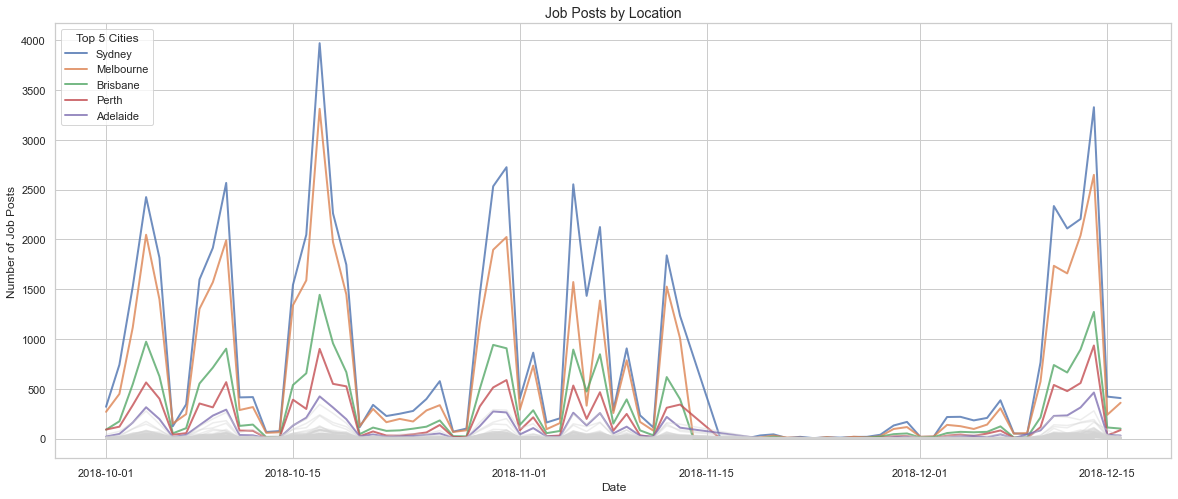

In [65]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

### Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

The time series above shows the number of job posts by location over time. As the values for location were missing from any job posts starting from the 16th of December 2018, the time series only covers a date range from the 1st of October 2018 - 15th December 2018.

    - There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.
    - The highest spikes are in mid October and mid December
    - There is a period with a very low amount of job postings from mid November to the start of December.
    - Some Blank/ low amount of data for period between November and December
    - No data For March
    - Not much job posts Saturday and sunday by average

## 3.3 Forecasting and skill extraction

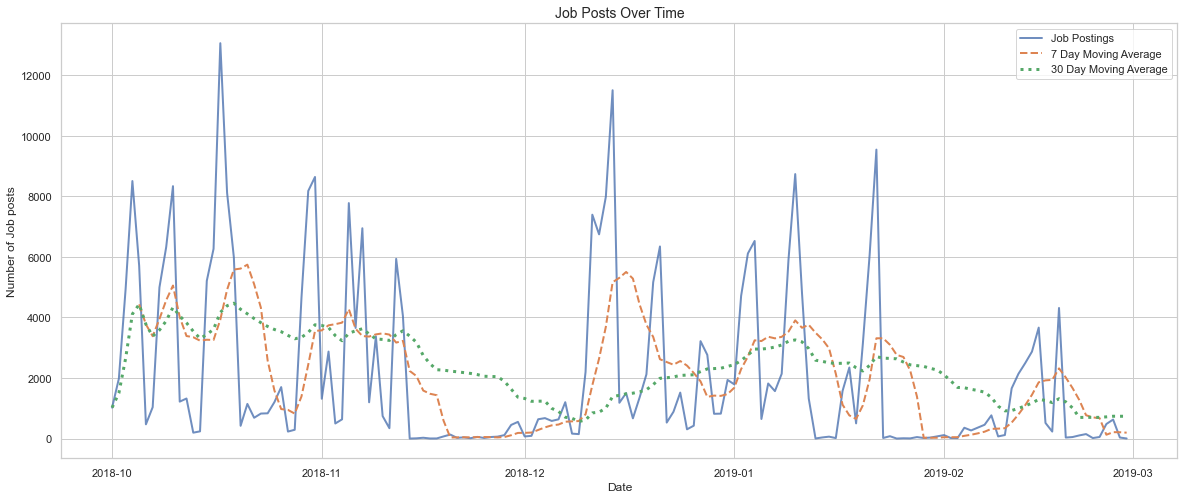

In [66]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

In [67]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [ ]:
def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)

# Part 4 - Scenarios

## Scenario 1

Some goals for Scenario 1. Guarantee job in Queensland with >=$80k pay in the future. What major should Tom pick?

In [68]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [69]:
df['Location'].unique()

array(['Sydney', 'Richmond & Hawkesbury', 'Brisbane',
       'Gosford & Central Coast', 'Adelaide', 'Melbourne', 'Perth',
       'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast',
       'West Gippsland & Latrobe Valley', 'Hervey Bay & Fraser Coast',
       'South West Coast VIC', 'Mornington Peninsula & Bass Coast',
       'Port Hedland, Karratha & Pilbara', 'Ballarat & Central Highlands',
       'Bendigo, Goldfields & Macedon Ranges',
       'Yarra Valley & High Country', 'Coffs Harbour & North Coast',
       'Newcastle, Maitland & Hunter', 'Tumut, Snowy & Monaro', 'Darwin',
       'Toowoomba & Darling Downs', 'ACT',
       'Wollongong, Illawarra & South Coast',
       'Port Macquarie & Mid North Coast',
       'Southern Highlands & Tablelands', 'Albury Area',
       'Yorke Peninsula & Clare Valley',
       'Kalgoorlie, Goldfields & Esperance',
       'Far West & North Central NSW', 'Cairns & Far North',
       'Wagga Wagga & Riverina', 'Lismore & Far North Coast',
       'Alice 

In [ ]:
df.head(10)

In [85]:
QLDfile = open("QLD.txt", "r")
locationsQLD = []
for line in QLDfile:
    locationsQLD.append(line.strip("\n"))
print(locationsQLD)
QLDfile.close()

['Brisbane', 'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast', 'Hervey Bay & Fraser Coast', 'Toowoomba & Darling Downs', 'Cairns & Far North', 'Northern QLD', 'Rockhampton & Capricorn Coast', 'Gladstone & Central QLD', 'Somerset & Lockyer', 'Western QLD', 'Bundaberg & Wide Bay Burnett']


In [122]:
QLDdf = df
QLDdf.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [129]:
QLDdf = QLDdf[QLDdf['Location'].isin(locationsQLD)]

In [131]:
QLDdf.describe()
QLDdf.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
13,37404335,BPV_Utility All Rounders_Casual,ISS Facility Services,2018-10-07 00:00:00+00:00,Mackay & Coalfields,NaN,Hospitality & Tourism,Housekeeping,An exciting opportunity exists for Casual DIDO...,NaN,0,30,NaN
15,37404259,Customer Service Officer,NaN,2018-10-07 00:00:00+00:00,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,0,30,NaN
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN


In [133]:
QLD80df = QLDdf.query('HighestSalary >= 80')
QLD80df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
12125,37402341,Operational Work Scheduler-Townsville,Queensland Rail,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,Government & Defence,Government - State,We are currently seeking an Operational Work S...,<p>The role is based in the Townsville depot f...,70,80,Full Time
12133,37400019,Account Manager,TPG Telecom Limited,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Sales,Account & Relationship Management,Are you a highly driven and experienced Accoun...,"<p style=""text-align:left;"">TPG Telecom Limite...",70,80,Full Time
12141,37399913,Occupational Therapist,Autism Queensland,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,Healthcare & Medical,"Physiotherapy, OT & Rehabilitation",Join a dynamic trans-disciplinary team | Centr...,"<h2 class=""subheading""><strong>About Autism Qu...",70,80,Full Time
12145,37399902,Cleaning Supervisor,Hays Manufacturing and Operation,2018-10-05 00:00:00+00:00,Gold Coast,NaN,Trades & Services,Cleaning Services,Family owned and operated food grade manufactu...,<p>Family owned and operated food grade manufa...,70,80,Full Time
12156,37399776,Electrician,Hays Trades & Labour,2018-10-05 00:00:00+00:00,Northern QLD,NaN,Trades & Services,Electricians,Immediately starting commercial electrical rol...,<p>Immediately starting commercial electrical ...,70,80,Contract/Temp


In [139]:
QLD80df.groupby('Classification').count().sort_values('Id',ascending=False)

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
Classification,,,,,,,,,,,,
Information & Communication Technology,2256,2256,2241,2256,2256,1603,2256,2256,2086,2256,2256,2086
Healthcare & Medical,2100,2100,2065,2100,2100,717,2100,2100,2066,2100,2100,2066
"Mining, Resources & Energy",1226,1226,1208,1226,1226,189,1226,1226,1164,1226,1226,1165
Government & Defence,943,943,941,943,943,418,943,943,909,943,943,909
Engineering,901,901,886,901,901,456,901,901,879,901,901,879
Trades & Services,875,875,839,875,875,308,875,875,845,875,875,845
Construction,793,793,760,793,793,341,793,793,776,793,793,776
Education & Training,744,744,722,744,744,388,744,744,732,744,744,732
Accounting,565,565,554,565,565,384,565,565,536,565,565,536


In [141]:
QLD80df.groupby('SubClassification').count().sort_values('Id',ascending=False)

,Id,Title,Company,Date,Location,Area,Classification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
SubClassification,,,,,,,,,,,,
Other,852,852,838,852,852,457,852,852,828,852,852,828
Government - State,646,646,646,646,646,297,646,646,621,646,646,621
Management,617,617,587,617,617,299,617,617,596,617,617,596
Mining - Engineering & Maintenance,423,423,416,423,423,47,423,423,400,423,423,401
Developers/Programmers,370,370,366,370,370,272,370,370,345,370,370,345
...,...,...,...,...,...,...,...,...,...,...,...,...
Tailors & Dressmakers,1,1,1,1,1,0,1,1,1,1,1,1
Tax Law,1,1,1,1,1,1,1,1,1,1,1,1
Administration,1,1,1,1,1,0,1,1,1,1,1,1


In [144]:
QLD80df[QLD80df['Classification']=="Information & Communication Technology"].groupby('SubClassification').count().sort_values('Id',ascending=False)

,Id,Title,Company,Date,Location,Area,Classification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
SubClassification,,,,,,,,,,,,
Developers/Programmers,370,370,366,370,370,272,370,370,345,370,370,345
Programme & Project Management,342,342,340,342,342,241,342,342,315,342,342,315
Business/Systems Analysts,324,324,321,324,324,224,324,324,290,324,324,290
Architects,185,185,185,185,185,123,185,185,174,185,185,174
Networks & Systems Administration,133,133,133,133,133,90,133,133,123,133,133,123
Testing & Quality Assurance,124,124,124,124,124,86,124,124,110,124,124,110
Other,108,108,108,108,108,78,108,108,99,108,108,99
Security,94,94,94,94,94,78,94,94,85,94,94,85
Consultants,93,93,93,93,93,66,93,93,89,93,93,89
